## Stock Market Price Prediction Mini Project


#### For this project, we can use various algorithms. Some of the suitable algorithms for this project are:  
#### 1. XGBoost Regressor

Gradient boosting trees, high accuracy.

Handles non-linear relationships well.

Works well with engineered features like lags and rolling stats.

####  Random Forest Regressor (with Lag Features)

Ensemble of decision trees, robust and interpretable.

Lag features add time context for better predictions.

Good baseline model, faster training.

#### Long Short-Term Memory (LSTM) Networks

Recurrent neural networks designed for sequential data.

Captures temporal dependencies in price and volume.

Requires more data and tuning.

#### ARIMA / SARIMA

Traditional time series forecasting models.

Useful for linear trends and seasonality.

Less effective with complex, nonlinear patterns.

## Implementing the project using RandomForest without lags

RMSE: 15.45
R-squared: 0.992249556606067


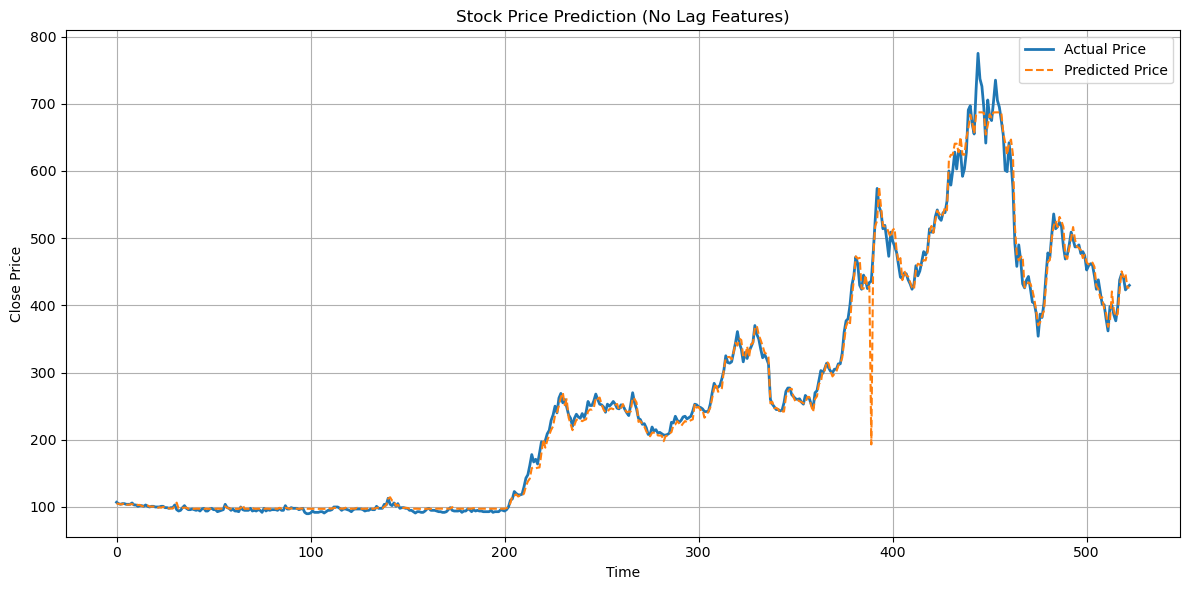

In [8]:
##Importig libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error


# Load the Data
url = "https://raw.githubusercontent.com/sarojrana/nepse-data/main/data/AHPC_2000-01-01_2021-12-31.csv"
df = pd.read_csv(url, parse_dates=['Date'])    #Parse the 'Date' column as datetime objects, initially date is in form of string
df = df.sort_values('Date')                    #sorting in ascending order,critical for time series data

# Feature Selection (drop unused columns)
# Drop date and keep only numeric features except target
features = df.drop(columns=['Date', 'Close Price'])

# Target variable
target = df['Close Price']

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # .fit() → calculates the mean and standard deviation of each feature in our training data
                                               # .transform() → uses those values to standardize (scale) the training data.

X_test_scaled = scaler.transform(X_test)   # we do not call .fit() on test data because doing so would cause data leakage (letting our model "peek" at future data).


# Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)  # n_estimators --> number of decision trees
model.fit(X_train_scaled, y_train)

# Step 6: Predict and Evaluate
y_pred = model.predict(X_test_scaled)

rmse = root_mean_squared_error(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {model.score(X_test_scaled, y_test)}")


# Plot Results

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Price', linewidth=2)
plt.plot(y_pred, label='Predicted Price', linestyle='--')
plt.title('Stock Price Prediction (No Lag Features)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### RMSE: 15.45 means:
On average, our predicted Close Prices are about 15.45 units off from the actual prices.
#### R-squared: 0.9922 means:
about 99.22% of the variance in the Close Price is explained by your model.
It means our model fits the data extremely well.

In [9]:
df.head()

,S.N.,Date,Total Transactions,Total Traded Shares,Total Traded Amount,Max. Price,Min. Price,Close Price
2613,2614,2010-04-15,2,30.0,12900.0,430.0,430.0,430.0
2612,2613,2010-04-15,2,30.0,12900.0,430.0,430.0,430.0
2611,2612,2010-04-15,2,30.0,12900.0,430.0,430.0,430.0
2610,2611,2010-04-19,4,310.0,129590.0,425.0,417.0,417.0
2609,2610,2010-04-20,16,390.0,155760.0,410.0,391.0,396.0


## Implementation of RandomForest using lags

RMSE with 6-day lag features: 14.07
R-squared with 6-day lag features: 0.9936


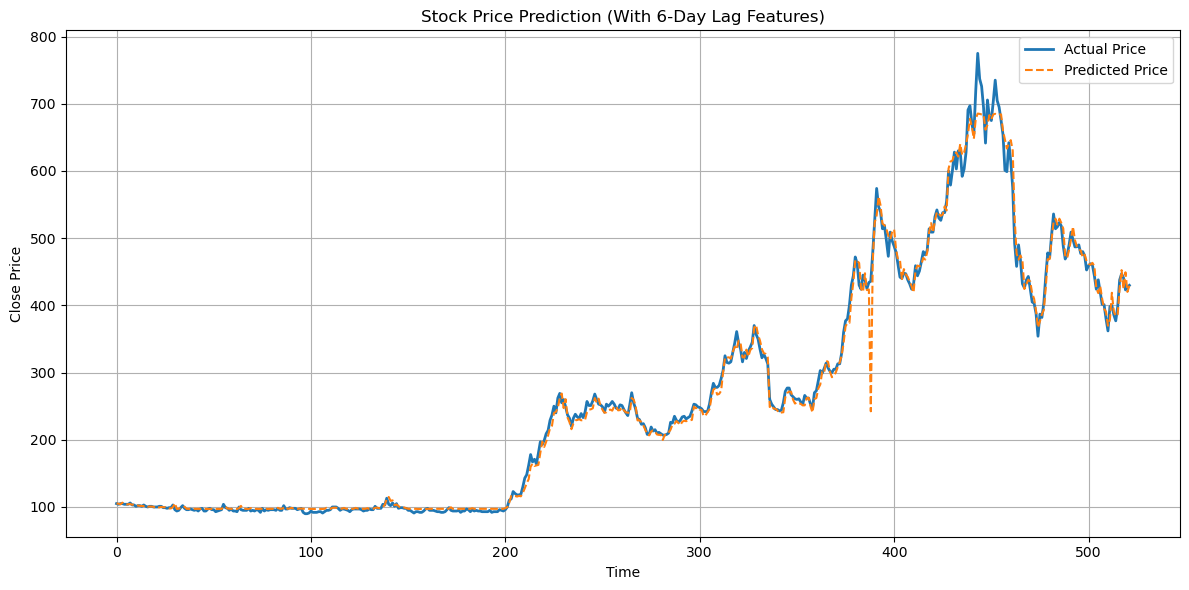

In [10]:
#Importing libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error

# Load the Data
url = "https://raw.githubusercontent.com/sarojrana/nepse-data/main/data/AHPC_2000-01-01_2021-12-31.csv"
df = pd.read_csv(url, parse_dates=['Date'])
df = df.sort_values('Date')

# Create lag features for Close Price for the past 6 days
lags = [1, 2, 3, 4, 5, 6]
for lag in lags:
    df[f'Close_lag_{lag}'] = df['Close Price'].shift(lag)   # .shift(lag) shifts the Close Price column down by lag rows
                                                            # Close_lag_1 is the previous day’s close price, Close_lag_2 is 2 days ago, etc.
                                                            # allows the model to use historical prices to predict future prices.


# Drop rows with NaN values caused by lagging
df = df.dropna()   #Since lag features create missing values for the first lag rows (there is no previous data for those days), we remove those rows to keep the dataset clean.

# Define features (drop Date and original Close Price since it's the target)
features = df.drop(columns=['Date', 'Close Price'])  # Drop Date since it’s a timestamp and usually not directly useful in raw form for prediction.

# Target variable
target = df['Close Price']

# Train-Test Split (no shuffle for time series)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # .fit() → calculates the mean and standard deviation of each feature in our training data
                                               # .transform() → uses those values to standardize (scale) the training data.

X_test_scaled = scaler.transform(X_test)   # we do not call .fit() on test data because doing so would cause data leakage (letting our model "peek" at future data).



# Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test_scaled)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"RMSE with 6-day lag features: {rmse:.2f}")
print(f"R-squared with 6-day lag features: {model.score(X_test_scaled, y_test):.4f}")

# Plot Results
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Price', linewidth=2)
plt.plot(y_pred, label='Predicted Price', linestyle='--')
plt.title('Stock Price Prediction (With 6-Day Lag Features)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
df.head()

,S.N.,Date,Total Transactions,Total Traded Shares,Total Traded Amount,Max. Price,Min. Price,Close Price,Close_lag_1,Close_lag_2,Close_lag_3,Close_lag_4,Close_lag_5,Close_lag_6
2607,2608,2010-04-22,4,240.0,92410.0,390.0,375.0,390.0,380.0,396.0,417.0,430.0,430.0,430.0
2606,2607,2010-04-25,8,570.0,219100.0,390.0,380.0,385.0,390.0,380.0,396.0,417.0,430.0,430.0
2605,2606,2010-04-26,5,80.0,30840.0,386.0,385.0,386.0,385.0,390.0,380.0,396.0,417.0,430.0
2604,2605,2010-04-28,4,90.0,35130.0,394.0,387.0,394.0,386.0,385.0,390.0,380.0,396.0,417.0
2603,2604,2010-04-29,6,280.0,113690.0,413.0,400.0,413.0,394.0,386.0,385.0,390.0,380.0,396.0
